In [1]:
import numpy as np
from gbdt_cython import GBDT
import cProfile
import pstats
import io
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from gbdt_cython import GBDT


In [2]:
# Create a simple dataset
np.random.seed(42)
X = np.random.rand(20, 2)  # 1000 samples, 2 features
y = np.random.rand(20) # 1000 target values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Parameters for a single tree
n_estimators = 1
max_depth = 1
min_samples_split = 1
learning_rate = 0.1
n_bins = 5

# Train the Cython GBDT model
gbdt_histogram = GBDT(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, learning_rate=learning_rate, n_bins=n_bins)
gbdt_histogram.fit(X_train, y_train)
y_pred_gbdt_histogram = gbdt_histogram.predict(X_test)

# Train the LightGBM model
lgbm = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, max_bin=n_bins, min_data_in_leaf=min_samples_split)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# Print predictions
print("Cython GBDT predictions:", y_pred_gbdt_histogram)
print("LightGBM predictions:", y_pred_lgbm)

# Evaluate and print the results
mse_gbdt_histogram = mean_squared_error(y_test, y_pred_gbdt_histogram)
r2_gbdt_histogram = r2_score(y_test, y_pred_gbdt_histogram)

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"Optimized Histogram GBDT (Cython) - MSE: {mse_gbdt_histogram:.4f}, R-squared: {r2_gbdt_histogram:.4f}")
print(f"LGBM - MSE: {mse_lgbm:.4f}, R-squared: {r2_lgbm:.4f}")

# Display the structure of the trees from both models
print("Cython GBDT Tree Structure:")
gbdt_histogram.display_trees()

# Dump the LightGBM model to JSON format
model_json = lgbm.booster_.dump_model()

# Function to print the tree structure from LightGBM
def print_lightgbm_tree(tree, depth=0):
    indent = "  " * depth
    if "leaf_value" in tree:
        print(f"{indent}Leaf: Predict {tree['leaf_value']}")
    else:
        print(f"{indent}Node: Feature {tree['split_feature']}, Split {tree['threshold']}")
        print_lightgbm_tree(tree["left_child"], depth + 1)
        print_lightgbm_tree(tree["right_child"], depth + 1)

print("LightGBM Tree Structure:")
print_lightgbm_tree(model_json['tree_info'][0]['tree_structure'])


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10
[LightGBM] [Info] Number of data points in the train set: 15, number of used features: 2
[LightGBM] [Info] Start training from score 0.501176
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
Cython GBDT predictions: [0.49051325 0.49051325 0.50863977 0.49051325 0.49051325]
LightGBM predictions: [0.50932649 0.50932649 0.49404415 0.50932649 0.50932649]
Optimized Histogram GBDT (Cython) - MSE: 0.0793, R-squared: 0.0233
LGBM - MSE: 0.0866, R-squared: -0.0662
Cython GBDT Tree Structure:
Tree 0:
N

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
import time
from gbdt_cython import GBDT

# Generate a larger random dataset
np.random.seed(42)
X = np.random.rand(10000, 1) * 100  # 1000 samples, 2 features
y = np.random.rand(10000) * 100  # 1000 target values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Parameters for a single tree
n_estimators = 100
max_depth = 10
min_samples_split = 1
learning_rate = 0.1
n_bins = 10

# Train the Cython GBDT model
gbdt_histogram = GBDT(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, learning_rate=learning_rate, n_bins=n_bins)
start_time = time.time()
gbdt_histogram.fit(X_train, y_train)
cython_train_time = time.time() - start_time
y_pred_gbdt_histogram = gbdt_histogram.predict(X_test)

# Train the LightGBM model
lgbm = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, max_bin=n_bins, min_data_in_leaf=min_samples_split)
start_time = time.time()
lgbm.fit(X_train, y_train)
lgbm_train_time = time.time() - start_time
y_pred_lgbm = lgbm.predict(X_test)

# Print predictions
print("Cython GBDT predictions:", y_pred_gbdt_histogram[:10])
print("LightGBM predictions:", y_pred_lgbm[:10])

# Evaluate and print the results
mse_gbdt_histogram = mean_squared_error(y_test, y_pred_gbdt_histogram)
r2_gbdt_histogram = r2_score(y_test, y_pred_gbdt_histogram)

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"Optimized Histogram GBDT (Cython) - MSE: {mse_gbdt_histogram:.4f}, R-squared: {r2_gbdt_histogram:.4f}, Training Time: {cython_train_time:.4f} seconds")
print(f"LGBM - MSE: {mse_lgbm:.4f}, R-squared: {r2_lgbm:.4f}, Training Time: {lgbm_train_time:.4f} seconds")


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 1
[LightGBM] [Info] Start training from score 50.372454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [4]:
print(f"Optimized Histogram GBDT (Cython) - MSE: {mse_gbdt_histogram:.4f}, R-squared: {r2_gbdt_histogram:.4f}, Training Time: {cython_train_time:.4f} seconds")
print(f"LGBM - MSE: {mse_lgbm:.4f}, R-squared: {r2_lgbm:.4f}, Training Time: {lgbm_train_time:.4f} seconds")

Optimized Histogram GBDT (Cython) - MSE: 270425749.4226, R-squared: -325849.7412, Training Time: 0.4057 seconds
LGBM - MSE: 830.9581, R-squared: -0.0013, Training Time: 0.7923 seconds


In [5]:
gbdt_histogram.display_trees()

Tree 0:
Node: Feature 0, Split 68.80350303886256
  Node: Feature 0, Split 9.48807264581328
    Node: Feature 0, Split 0.0011634755366141114
      Leaf: Predict -1.0326149080508873
      Leaf: Predict -0.8232494173586193
    Node: Feature 0, Split 49.10577460260376
      Node: Feature 0, Split 19.228279874055502
        Leaf: Predict 0.992760206442074
        Node: Feature 0, Split 29.207460602399482
          Leaf: Predict -0.2645378800109575
          Node: Feature 0, Split 39.285132386738944
            Leaf: Predict 0.3674134035083179
            Leaf: Predict 0.12943293604462539
      Node: Feature 0, Split 58.92930612330914
        Leaf: Predict -0.5837731366738255
        Leaf: Predict -0.79983545286192
  Node: Feature 0, Split 79.45952014397301
    Leaf: Predict 0.6823834977117286
    Leaf: Predict 1.3320207512494544
Tree 1:
Node: Feature 0, Split 68.80350303886256
  Node: Feature 0, Split 9.48807264581328
    Node: Feature 0, Split 0.0011634755366141114
      Leaf: Predict -1.1

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
import time
from gbdt_cython import GBDT

# Generate a larger random dataset
np.random.seed(42)
X = np.random.rand(1000, 2) * 100  # 1000 samples, 2 features
y = np.random.rand(1000) * 100  # 1000 target values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Parameters for a single tree
n_estimators = 1
max_depth = 3
min_samples_split = 1
learning_rate = 1
n_bins = 10

# Train the Cython GBDT model
gbdt_histogram = GBDT(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, learning_rate=learning_rate, n_bins=n_bins)
start_time = time.time()
gbdt_histogram.fit(X_train, y_train)
cython_train_time = time.time() - start_time
y_pred_gbdt_histogram = gbdt_histogram.predict(X_test)

# Train the LightGBM model
lgbm = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, max_bin=n_bins, min_data_in_leaf=min_samples_split)
start_time = time.time()
lgbm.fit(X_train, y_train)
lgbm_train_time = time.time() - start_time
y_pred_lgbm = lgbm.predict(X_test)

# Print predictions
print("Cython GBDT predictions:", y_pred_gbdt_histogram[:10])
print("LightGBM predictions:", y_pred_lgbm[:10])

# Evaluate and print the results
mse_gbdt_histogram = mean_squared_error(y_test, y_pred_gbdt_histogram)
r2_gbdt_histogram = r2_score(y_test, y_pred_gbdt_histogram)

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"Optimized Histogram GBDT (Cython) - MSE: {mse_gbdt_histogram:.4f}, R-squared: {r2_gbdt_histogram:.4f}, Training Time: {cython_train_time:.4f} seconds")
print(f"LGBM - MSE: {mse_lgbm:.4f}, R-squared: {r2_lgbm:.4f}, Training Time: {lgbm_train_time:.4f} seconds")

# Display the structure of the trees from both models
print("Cython GBDT Tree Structure:")
print( gbdt_histogram.display_trees() )

# Dump the LightGBM model to JSON format
model_json = lgbm.booster_.dump_model()

# Function to print the tree structure from LightGBM
def print_lightgbm_tree(tree, depth=0):
    indent = "  " * depth
    if "leaf_value" in tree:
        print(f"{indent}Leaf: Predict {tree['leaf_value']}")
    else:
        print(f"{indent}Node: Feature {tree['split_feature']}, Split {tree['threshold']}")
        print_lightgbm_tree(tree["left_child"], depth + 1)
        print_lightgbm_tree(tree["right_child"], depth + 1)

print("LightGBM Tree Structure:")
print_lightgbm_tree(model_json['tree_info'][0]['tree_structure'])


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 2
[LightGBM] [Info] Start training from score 50.599705
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
Cython GBDT predictions: [43.8268574  43.8268574  49.18228518 51.56363732 51.56363732 49.18228518
 51.56363732 48.96348778 49.18228518 48.96348778]
LightGBM predictions: [46.01665407 46.01665407 54.35855003 49.79064992 49.79064992 54.35855003
 49.79064992 51.49170561 54.35855003 52.84685749]
Optimized

In [7]:
print("Cython GBDT predictions:", y_pred_gbdt_histogram[:10])
print("LightGBM predictions:", y_pred_lgbm[:10])

Cython GBDT predictions: [43.8268574  43.8268574  49.18228518 51.56363732 51.56363732 49.18228518
 51.56363732 48.96348778 49.18228518 48.96348778]
LightGBM predictions: [46.01665407 46.01665407 54.35855003 49.79064992 49.79064992 54.35855003
 49.79064992 51.49170561 54.35855003 52.84685749]


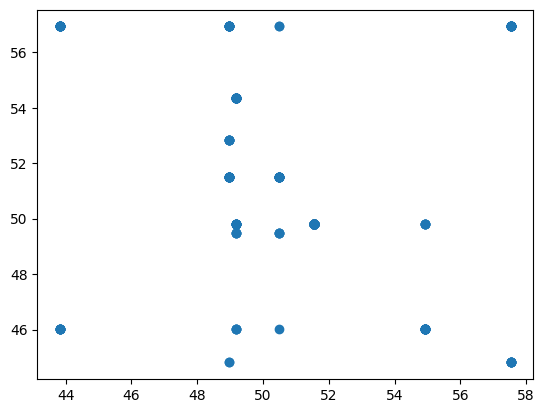

In [8]:
import matplotlib.pyplot as plt
plt.scatter(y_pred_gbdt_histogram, y_pred_lgbm)